## Airbnb Listings Bangkok

 ## **Pemahaman Bisnis**

### **Latar Belakang**
Bangkok adalah salah satu kota dengan perkembangan terpesat, dengan ekonomi yang dinamis dan kemasyarakatan yang terus berkembang di Asia Tenggara. Kota ini sedang berkembang menjadi pusat regional yang dapat menyaingi Singapura dan Hong Kong , Airbnb hadir sebagai platform terdepan bagi wisatawan yang mencari akomodasi dengan biaya terjangkau. Namun, dengan semakin banyaknya jumlah unit, pemilik unit menghadapi tantangan dalam menetapkan harga yang kompetitif, memahami dinamika pasar, dan mengoptimalkan unit mereka untuk memaksimalkan tingkat hunian. Analisis ini memanfaatkan wawasan berbasis data untuk membantu pemilik unit Airbnb di Bangkok dalam menghadapi atau beradaptasi dengan kompleksitas pasar. Dengan menganalisis faktor-faktor utama seperti persaingan lokasi dan distribusi geografis, tren harga, tingkat hunian, dan review dari pelanggan,yang mana tujuan akhirnya untuk memberikan strategi yang dapat ditindaklanjuti bagi pemilik unit untuk meningkatkan listing mereka, menarik lebih banyak tamu, dan meningkatkan pendapatan mereka.

### **Pernyataan Masalah**
Pemilik properti belum memiliki pemahaman yang lebih detail terhadap beberapa hal berikut :
1. **Harga Rata - rata per tipe kamar:** Bagaimana harga rata - rata per tipe kamar,Tipe mana yang paling mahal/murah?
2. **Harga Rata-rata per Kawasan (Neighbourhood):** Kawasan mana yang paling premium atau terjangkau?
3. **Sebaran Tipe Kamar:** Apakah lebih banyak rumah/apartemen seutuhnya atau hanya kamar pribadi?
4. **Distribusi Geografis:** Apakah listing terkonsentrasi di pusat kota?
5. **Persebaran harga berdasarkan lokasi:** apakah dapat di ketahui lokasi listing dengan harga tinggi atau rendah.
6. **Pemilik dengan banyak Listing :** Apakah ada "superhost" yang punya banyak properti?
7. **Ketersediaan Properti :** Berapa hari dalam setahun properti tersedia untuk disewa?
8. **Listing dengan review terbanyak :** Mana listing yang paling populer?
9. **Review Per Bulan :** Apakah ada listing yang sangat aktif dan menarik banyak tamu?

## **Pemahaman Data dan Pembersihan Data**

Sebelum melakukan analisis data, penting untuk memahami dan menyiapkan data secara menyeluruh. Ini melibatkan pemeriksaan struktur data , identifikasi jenis variabel, dan pengecekan data yang hilang (missing value) atau tidak konsisten. Setelah memperoleh informasi awal melalui statistik deskriptif, pembersihan data perlu dilakukan, seperti nilai yang hilang atau ketidakkonsistenan. Tujuannya untuk memastikan dataset akurat, lengkap, dan siap untuk dianalisis.

### **Importing Libraries and Dataset**

In [1]:
# Importing Library-library yang diperlukan

# Library untuk pembersihan data dan manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Library untuk uji normalitas
import scipy.stats as stats

# Library untuk text analysis
import re
from collections import Counter
import string

# libary lainnya 
import warnings
warnings.filterwarnings("ignore")

#### **Loading the Dataset**

Berikut Dataset **Airbnb Listings Bangkok** ditampilkan terlebih dahulu untuk data 5 teratas dan 5 terbawah :

In [2]:
# Loading the dataset
data = "Airbnb Listings Bangkok.csv"
df = pd.read_csv(data)

In [3]:
# Tampilkan 5 data teratas
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
# Tampilkan 5 data terbawah
df.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Dari Dataset yang diloading terdapat beberapa nilai yang hilang (NaN) di kolom **'last_review'** dan **'reviews_per_month'**. Selain itu, kolom **'name'** berisi karakter abjad khusus

#### **Data Dictionary Overview**

Untuk pemahaman yang lebih baik terkait data dictionary yang diperoleh terkait **Airbnb Listings Bangkok** maka berikut penjelasannya:

* id : kode unik atas listing Airbnb
* name : nama dari listing
* host_id : kode unik atas pemilik listing
* host_name : nama dari pemilik listing,biasanya menggunakan nama depan
* neighborhood : lokasi geografis dikodekan menggunakan garis lintang dan garis bujur terhadap lokasi yang diddefenisikan
* latitude : Menggunakan proyeksi Sistem Geodetik Dunia (WGS84) untuk lintang dan bujur
* longitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk lintang dan bujur
* roomtype : terdiri dari --> Entire home/apt, Private room, Shared room, or Hotel
* price : harga sewa per hari dalam mata uang lokal
* minimum_nights : jumlah malam minimal untuk lama menginap / pemesanan
* number_of_reviews : banyaknya ulasan atas listing yang bersangkutan
* last_review : tanggal ulasan terakhir atau dengan kata lain ulasan terbaru
* calculated_host_listings_count : jumlah tempat tinggal dari tuan rumah yang sama
* availability_365 : jumlah hari ketersediaan unit dalam 365 hari
* number_of_reviews_ltm : jumlah ulasan dalam 12 bulan terakhr ( last twelve month )

### **Ringkasan Data**

In [5]:
##Jumlah Baris dan Kolom 
print(f"Jumlah Baris dan Kolomnya adalah ==> {df.shape}")

Jumlah Baris dan Kolomnya adalah ==> (15854, 17)


In [6]:
## Lihat nama kolomnya 
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [7]:
# Lihat informasi terkait struktur dan isi Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**Review terkait informasi dataframe diatas:**
* Total Kolom ada 17 kolom dengan rincian :
  - 12 kolom bertipe numerik --> yang Dtypenya int64 -->(9) dan float64 -->(3)
  - 5 kolom bertipe kategorikal --> yang Dtypenya object -->(5)
* Ada beberapa kolom berisi data yang hilang(missing value) yaitu **name**,**host_name**,**last_review**,**reviews_per_month**
* Untuk Kolom last_review tipe datanya object padahal isinya itu adalah tanggal,sehingga ini bisa dikatakan anomali,harus di konversi untuk dinormalkan

In [8]:
# untuk melihat detail kolom name yang missing value:
# df[df['name'].isna()]
# df[df['host_name'].isna()]
# df[df['last_review'].isna()]
# df[df['reviews_per_month'].isna()]

### **Pengecekan Nilai Unik ( Unique Values )**

In [9]:
pd.DataFrame({
    "column": df.columns.values,  ## cek nama nama kolom pada Dataframe asli
    "data_type": df.dtypes.values,        ## tipe data dari tiap kolom yang ada di Dataframe asli
    "negative_values": [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns], ## cek kolom yg tipe integer ada nilai negatif atau tidak
    "number_of_unique_values": df.nunique().values,  ## informasi jumlah nilai unik atas masing masing kolom
    "unique_values": [df[col].unique() for col in df.columns] ## nilai nilai unik dalam setiap kolom
})

,column,data_type,negative_values,number_of_unique_values,unique_values
0,Unnamed: 0,int64,False,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,False,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,object,False,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,int64,False,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,object,False,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,object,False,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,float64,False,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,float64,False,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,object,False,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,int64,False,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


**Dari beberapa informasi diatas dapat di peroleh beberapa informasi penting yaitu :**
- **Banyaknya data dan jumlah host unik** : data berisi 15.854 listing dengan nilai id unik, dan 6.659 host unik
- **Lokasi dan Tipe kamar** : untuk lokasi ada 50 lokasi unik,untuk tipe kamar ada 4 tipe : Entire home/apt,Private room,Hotel room,Shared room
- **Kisaran harga listing**: terdiri dari 3040 harga unik dengan katalain alternatif range harganya cukup banyak pilihannya
- **Ulasan** : ada 298 nilai unik pada column number_of_reviews,artinya cukup banyak listing dari yang di review oleh pelanggan
- **Pemilik unit** : pada calculated_host_listings_count terlihat ada 50 nilai unik yang mengindikasikan 1 host mengelola beberapa unit listing

### **Pengecekan Data Dobel ( Duplicated Data )**

In [10]:
## Cek semua data duplikat yang ada dalam dataset
df.duplicated().sum()

0

In [11]:
# Cek kolom id untuk memastikan datanya unik
df.duplicated(["id"]).sum()

0

Kesimpulannya untuk dataset dipastikan **tidak ada** data yang **Duplikasi / Dobel**

### **Pengecekan data yang Anomali / menyimpang dan Outliers**

Untuk pengecekan Anomali dapat dilakukan statistik deskriptif agar data dapat diidentifikasi sehingga analisa bisa lebih tepat dan akurat

In [12]:
# Statistik deskriptif Data Numerik
pd.set_option('display.float_format', '{:.6f}'.format)
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,157939679701701248.000000,154105783.575817,13.745144,100.559903,3217.703923,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,294601541771321472.000000,131872648.110098,0.043040,0.050911,24972.122358,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,27934.000000,58920.000000,13.527300,100.329550,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,21045091.500000,39744308.000000,13.720090,100.529690,900.000000,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,35037340.000000,122455569.000000,13.738490,100.561415,1429.000000,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,52561542.250000,239054687.500000,13.759497,100.585150,2429.000000,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,790816217344482048.000000,492665929.000000,13.953540,100.923440,1100000.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [13]:
# Statistik deskriptif Data Kategorikal
df.describe(include=["object"])

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


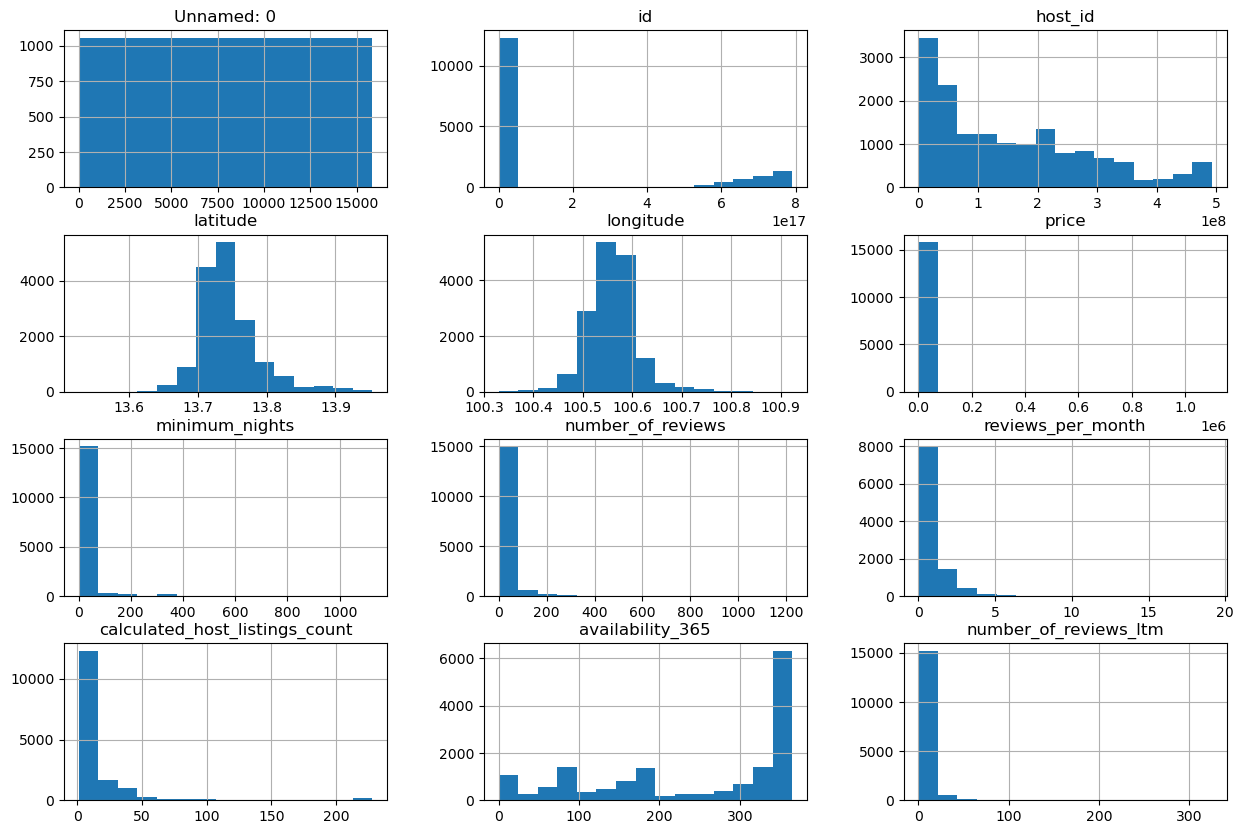

In [14]:
#pakai histogram untuk lihat distribusi variabel numerik
df.hist(bins=15, figsize=(15,10));

- Statistik deskriptif mengungkap anomali pada kolom 'price', di mana nilai minimumnya adalah 0.Setiap listing pasti ada harga sewa tidak mungkin Gratis
- Secara harga juga terlihat antara Q1,Q2,Q3 dibandingkan dengan nilai maksimumnya cukup besar artinya ini menunjukkan ada outlier
- Selain itu, kolom 'minimum_nights' menampilkan rentang yang luas, dengan minimum 1 dan maksimum 1125. sedangkan kuartal ketiga (Q3) saja hanya 7, artinya ada outlier
  yang cukup besar
- Kolom lain juga terlihat ada outlier, tapi untuk saat ini kita abaikan dahulu

#### **Penanganan Anomali**

Pengecekan lebih lanjut anomali pada kolom **'price"** 

In [15]:
df[df["price"] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.738150,100.564200,Hotel room,0,1,0,NaN,NaN,1,0,0


data data diatas terlihat bahwa indeks **11103** dari id **44563108** untuk kolom **price** bernilai **0**

In [16]:
##Menghapus data yang bernilai 0:
df.drop(index=11103, inplace=True)

In [17]:
##cek kembali data Price  yang di delete
df[df["price"] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [18]:
df.shape

(15853, 17)

Terlihat data berhasil dihapus dimana total baris sudah berkurang dari 15854 menjadi 15853  ==> sudah berkurang atas indeks 11103 yang di delete

### **Pengecekan Nilai yang hilang ( Missing Values )**

Agar pada saat melakukan data analisis hasilnya dapat lebih akurat,maka perlu dilakukan pengecekan data yang hilang ( missing values )

In [19]:
# Pengecekan data yang hilang ( missing values )
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

**Terlihat ada sejumlah missing values pada kolom :**
- name --> 8
- host_name --> 1
- last_review --> 5789
- reviews_per_month --> 5789

In [20]:
# Menghitung persentase data yang hilang dari setiap kolom
df_percent_hilang = round(df.isna().sum() * 100/len(df), 2)
df_percent_hilang.to_frame().rename(columns={0:"Percentase data hilang"}).reset_index()

,index,Percentase data hilang
0,Unnamed: 0,0.000000
1,id,0.000000
2,name,0.050000
3,host_id,0.000000
4,host_name,0.010000
5,neighbourhood,0.000000
6,latitude,0.000000
7,longitude,0.000000
8,room_type,0.000000
9,price,0.000000


Beberapa kesimpulan yang dapat diambil :
- Dari 17 kolom data hanya 4 kolom yang terdapat data hilang yaitu **name,host_name,last_review,reviews_per_month**,sehingga datanya sebenarnya cukup lengkap
- untuk data yang hilang dari 4 kolom tersebut harus di bereskan sehingga data lebih valid
- untuk kolom **last_review** dan **reviews_per_month** memiliki missing values yang cukup banyak yaitu 5789 ==> sekitar 36.52% dari banyaknya data

#### **Penanganan data yang hilang untuk kolom : *name* and *host_name***

* data yang hilang barisnya / datanya tetap dipetahankan dimana untuk data yang hilang di isi dengan keterangan 'Unknown'
* dengan mengganti data yang hilang tersebut dengan keterangan 'Unknown' maka informasi lainnya tidak hilang

In [21]:
# Mengganti nilai yang hilang untuk kolom name dan host_name dengan keterangan ==> Unknown
df["name"].fillna("Unknown", inplace=True)
df["host_name"].fillna("Unknown", inplace=True)

# Pengecekan kembali datanya
df[["name", "host_name"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,name,0
1,host_name,0


In [22]:
##print(df[df['name'] == 'Unknown'])

### **Penanganan data yang hilang untuk kolom : *last_review* and *reviews_per_month***


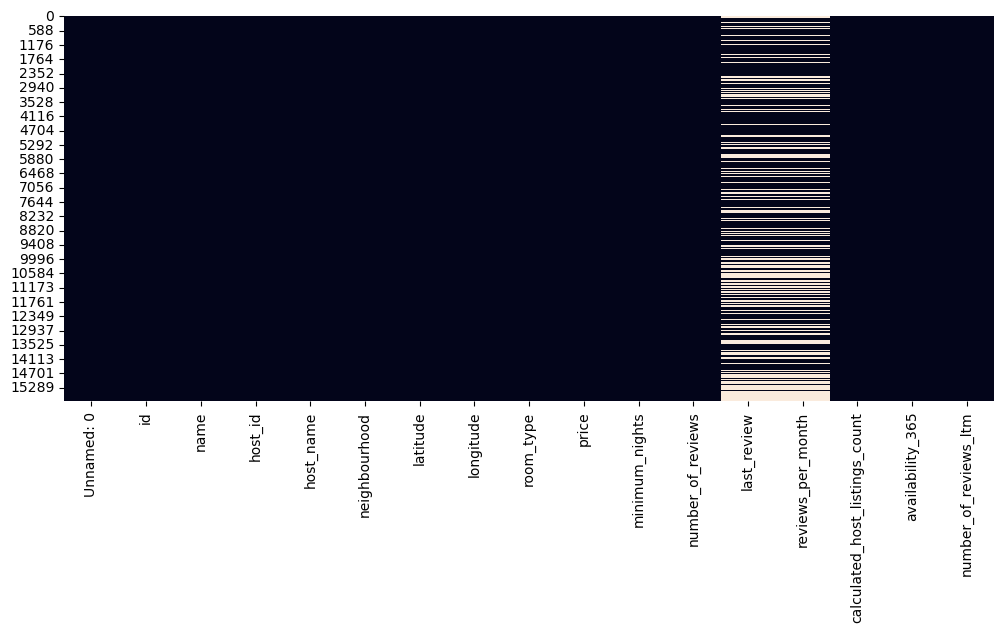

In [23]:
# Visualisasi nilai yang hilang
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Tampak di bagian Last_reviews dan reviews_per_month berwarna putih yang cukup banyak yang menandakan data dengan nilai Null dalam Dataframe,ynag mengindikasikan **Missing Values**

In [24]:
#Memastikan nilai yang hilang di 2 kolom tersebut apakah di baris yang sama,dimana terlihat diatas tampaknya dalam baris yang sama
df[(df["last_review"].isna()) & (df["reviews_per_month"].isna())]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Kesimpulan :
- data yang hilang dari kedua kolom ada di posisi baris yang sama 
- Jumlah data dari hasil diatas terlihat bahwa terdapat 5789 baris data yang merupakan missing values / data hilang yang diidentifikasi di awal

In [25]:
# Mengkonversi isi kolom last_review  dari tipe  object ke datetime
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce") ## untuk nilai yang yang tidak valid di konversi jadi NaT ( not a time )

In [26]:
# isi kolom 'reviews_per_month' dengan nilai 0
df["reviews_per_month"].fillna(0, inplace=True)

In [27]:
# isi kolom 'last_review' dengan tanggal dan waktu default 1970-01-01 ==> titik awal penghitungan waktu dalam sistem Unix.
df["last_review"].fillna(pd.to_datetime("1970-01-01"), inplace=True)

In [28]:
#Pengecekan perubahan yang sudah dilakukan
df[["last_review", "reviews_per_month"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,last_review,0
1,reviews_per_month,0


sudah tidak ada missing values

### **Penghapusan kolom - kolom yang tidak terlalu di perlukan dalam analisa**

Dari data yang ada terdapat beberapa kolom yang tidak terlalu diperlukan dalam analisa yaitu:
- Kolom **Unnamed: 0**
- Kolom **id**

In [29]:
# Hapus kolom yang tidak terlalu diperlukan dari dataset
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

# Cek kembali hasil dari kolon yang di hapus
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.500000,2,353,0
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,1970-01-01,0.000000,2,358,0
2,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1970-01-01,0.000000,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.030000,1,323,1
4,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,1970-01-01,0.000000,3,365,0


In [30]:
# Checking the number of rows and columns in the clean dataset
f"Banyaknya baris dan kolom atas dataset terakhir adalah {df.shape}"

'Banyaknya baris dan kolom atas dataset terakhir adalah (15853, 15)'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15853 non-null  object        
 1   host_id                         15853 non-null  int64         
 2   host_name                       15853 non-null  object        
 3   neighbourhood                   15853 non-null  object        
 4   latitude                        15853 non-null  float64       
 5   longitude                       15853 non-null  float64       
 6   room_type                       15853 non-null  object        
 7   price                           15853 non-null  int64         
 8   minimum_nights                  15853 non-null  int64         
 9   number_of_reviews               15853 non-null  int64         
 10  last_review                     15853 non-null  datetime64[ns]
 11  reviews

Terlihat total baris masih tetap tetapi total kolom sudah berubah dari **17 ke 15** artinya kolom **Unnamed: 0,id** sudah dihapus dari dataset

In [32]:
#Simpan data set yang sudah bersih( clean ) ke file CSV yang baru
#df.to_csv('Airbnb Listings Bangkok_clean.csv', index=False)

## **Data Analysis**

## Data Analysis akan di uraikan berdasarkan berbagai hal untuk kemudian diberikan Insight,Strategic Implications,Strategic Recommendations serta Conclusion

## Analisis dasar

## 1. Harga Rata - rata per tipe kamar

In [49]:
# Pilih kolom yang dibutuhkan
df[['room_type','price']]

,room_type,price
0,Entire home/apt,1905
1,Private room,1316
2,Private room,800
3,Private room,1286
4,Private room,1905
...,...,...
15849,Private room,2298
15850,Private room,1429
15851,Private room,1214
15852,Private room,1214


In [50]:
# Hitung rata-rata harga berdasarkan tipe kamar
price_avg = df.groupby("room_type")["price"].mean().reset_index()
# Urutkan data berdasarkan harga rata-rata
price_avg = price_avg.sort_values(by="price", ascending=False)

In [51]:
price_avg.to_csv("price_avg.csv", index=False)

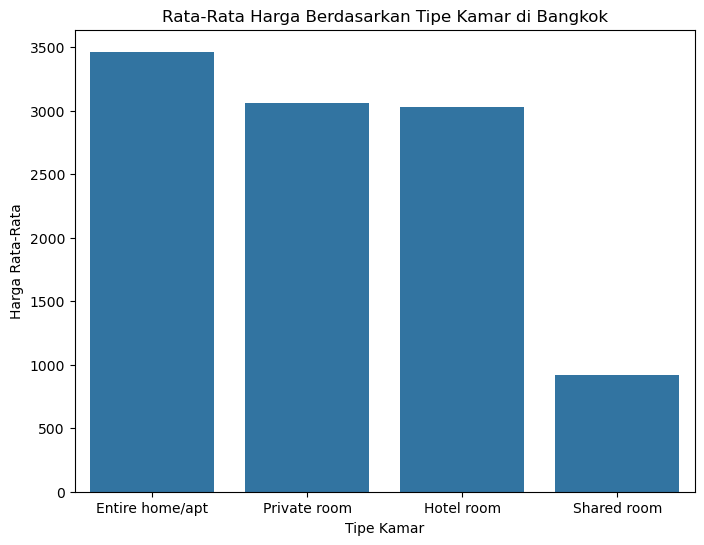

In [35]:
# Visualisasikan data
plt.figure(figsize=(8,6))
sns.barplot(x="room_type", y="price", data=price_avg)
plt.title("Rata-Rata Harga Berdasarkan Tipe Kamar di Bangkok")
plt.xlabel("Tipe Kamar")
plt.ylabel("Harga Rata-Rata")
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Tipe Kamar Paling Mahal**: Entire home/apt memiliki rata-rata harga yang paling mahal dibandingkan dengan tipe kamar lainnya.
2. **Tipe Kamar Paling Murah**: Shared room memiliki rata-rata harga yang paling murah dibandingkan dengan tipe kamar lainnya.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peningkatan Harga untuk Entire home/apt**: Pemilik properti dapat meningkatkan harga untuk Entire home/apt untuk meningkatkan pendapatan.
2. **Fokus pada Tipe Kamar yang Paling Dicari**: Pemilik properti dapat fokus pada tipe kamar yang paling dicari oleh tamu untuk meningkatkan pendapatan.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Kualitas Layanan untuk Entire home/apt**: Pemilik properti dapat meningkatkan kualitas layanan untuk Entire home/apt untuk membenarkan harga yang lebih
   mahal
3. **Meningkatkan Jumlah Tipe Kamar yang Paling Dicari**: Pemilik properti dapat meningkatkan jumlah tipe kamar yang paling dicari oleh tamu untuk meningkatkan pendapatan.
4. **Diversifikasi Pasar**: Pemilik properti dapat diversifikasi pasar untuk meningkatkan pendapatan dan mengurangi risiko.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Entire home/apt Memiliki Harga Paling Mahal**: Entire home/apt memiliki rata-rata harga yang paling mahal dibandingkan dengan tipe kamar lainnya.
2. **Shared room Memiliki Harga Paling Murah**: Shared room memiliki rata-rata harga yang paling murah dibandingkan dengan tipe kamar lainnya.
3. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan fokus pada tipe kamar yang paling dicari dan meningkatkan kualitas
   layanan.

## 2. Harga Rata-rata per Kawasan (Neighbourhood)

In [53]:
# Pilih kolom yang dibutuhkan
df[['neighbourhood', 'room_type', 'price']]

,neighbourhood,room_type,price
0,Ratchathewi,Entire home/apt,1905
1,Bang Na,Private room,1316
2,Bang Kapi,Private room,800
3,Din Daeng,Private room,1286
4,Bang Kapi,Private room,1905
...,...,...,...
15849,Pra Wet,Private room,2298
15850,Ratchathewi,Private room,1429
15851,Ratchathewi,Private room,1214
15852,Ratchathewi,Private room,1214


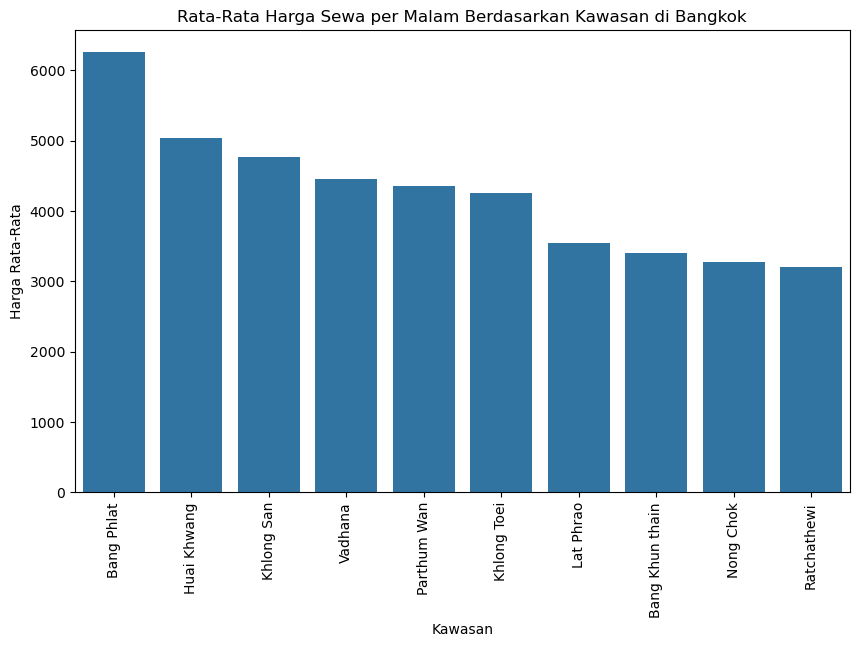

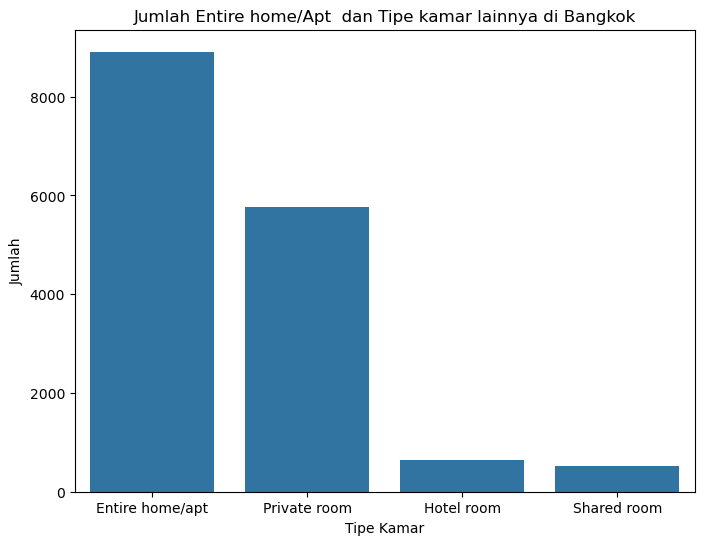

In [54]:

# Hitung rata-rata harga
price_avg = df.groupby("neighbourhood")["price"].mean().reset_index()

# Urutkan data
price_avg = price_avg.sort_values(by="price", ascending=False)

price_avg.to_csv("price_avg_kawasan.csv", index=False)

# Visualisasikan data
plt.figure(figsize=(10,6))
sns.barplot(x="neighbourhood", y="price", data=price_avg.head(10))
plt.title("Rata-Rata Harga Sewa per Malam Berdasarkan Kawasan di Bangkok")
plt.xlabel("Kawasan")
plt.ylabel("Harga Rata-Rata")
plt.xticks(rotation=90)
plt.show()

# Bandingkan jumlah rumah/apartemen seutuhnya dengan kamar pribadi
room_type_count = df["room_type"].value_counts().reset_index()
room_type_count.columns = ["room_type", "count"]

room_type_count.to_csv("room_type_count.csv", index=False)

# Visualisasikan data
plt.figure(figsize=(8,6))
sns.barplot(x="room_type", y="count", data=room_type_count)
plt.title("Jumlah Entire home/Apt  dan Tipe kamar lainnya di Bangkok")
plt.xlabel("Tipe Kamar")
plt.ylabel("Jumlah")
plt.show()


#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Kawasan Populer Memiliki Harga Lebih Tinggi**: Kawasan populer di Bangkok memiliki harga rata-rata sewa per malam yang lebih tinggi daripada kawasan lain.
2. **Entire home/apt Lebih Banyak**: Entire home/apt lebih banyak daripada tipe kamar lainnya di Bangkok.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peningkatan Harga di Kawasan Populer**: Pemilik properti dapat meningkatkan harga sewa di kawasan populer untuk meningkatkan pendapatan.
2. **Fokus pada Entire home/apt**: Pemilik properti dapat fokus pada Entire home/apt untuk memenuhi permintaan pasar.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Fokus pada Kawasan Populer**: Pemilik properti dapat fokus pada kawasan populer di Bangkok untuk meningkatkan pendapatan.
2. **Meningkatkan Jumlah Entire home/apt**: Pemilik properti dapat meningkatkan jumlah Entire home/apt untuk memenuhi permintaan pasar.
3. **Diversifikasi Pasar**: Pemilik properti dapat diversifikasi pasar ke kawasan lain di Bangkok untuk meningkatkan pendapatan dan mengurangi risiko.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Kawasan Populer Memiliki Harga Lebih Tinggi**: Kawasan populer di Bangkok memiliki harga rata-rata sewa per malam yang lebih tinggi daripada kawasan lain.
2. **Entire home/apt Lebih Banyak**: Jumlah Entire home/apt lebih banyak daripada tipe kamar lainnya di Bangkok.
3. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan fokus pada kawasan populer dan meningkatkan jumlah Entire home/apt

## 3. Sebaran Tipe Kamar

In [55]:
# Pilih kolom yang dibutuhkan
df['room_type']

0        Entire home/apt
1           Private room
2           Private room
3           Private room
4           Private room
              ...       
15849       Private room
15850       Private room
15851       Private room
15852       Private room
15853       Private room
Name: room_type, Length: 15853, dtype: object

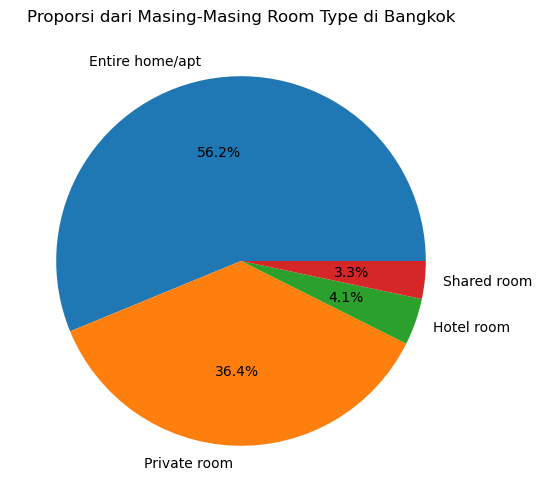

In [56]:
# Hitung proporsi
room_type_prop = df["room_type"].value_counts().reset_index()
room_type_prop.columns = ["room_type", "count"]

room_type_prop.to_csv("room_type_prop.csv", index=False)

plt.figure(figsize=(8,6))
plt.pie(room_type_prop["count"], labels=room_type_prop["room_type"], autopct='%1.1f%%')
plt.title("Proporsi dari Masing-Masing Room Type di Bangkok")
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Entire home/apt lebih banyak**: Entire home/apt memiliki proporsi yang lebih besar dibandingkan dengan tipe lainnya.
2. **Tipe kamar selain Entire home/apt Masih Menjadi Pilihan**: tipe kamar selain Entire/apt masih menjadi pilihan yang populer di kalangan tamu.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Fokus pada Entire home/apt**: Pemilik properti dapat fokus pada Entire home/apt untuk memenuhi permintaan pasar.
2. **Meningkatkan Jumlah Kamar untuk Shared,Hotel dan private room**: Pemilik properti dapat meningkatkan jumlah kamar Shared,Hotel dan private room untuk memenuhi
   permintaan tamu.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Kualitas Layanan untuk Entire home/apt**: Pemilik properti dapat meningkatkan kualitas layanan untuk rumah/apartemen seutuhnya untuk memenuhi harapan tamu
2. **Meningkatkan Jumlah Shared,Hotel dan private room Harga Kompetitif**: Pemilik properti dapat meningkatkan jumlah Shared,Hotel dan private room dengan harga kompetitif
   untuk menarik tamu.
4. **Diversifikasi Pasar**: Pemilik properti dapat diversifikasi pasar untuk meningkatkan pendapatan dan mengurangi risiko.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Entire home/apt Lebih Banyak**: Entire home/apt memiliki proporsi yang lebih besar dibandingkan dengan kamar pribadi.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan fokus padaEntire home/apt dan meningkatkan jumlah  untuk Shared,Hotel
   dan private room dengan harga kompetitif.

## Analisis Geospasial (Lokasi)

## 4. Distribusi Geografis

In [40]:
# Pilih kolom yang dibutuhkan
df[["latitude", "longitude"]]

,latitude,longitude
0,13.759830,100.541340
1,13.668180,100.616740
2,13.752320,100.624020
3,13.788230,100.572560
4,13.768720,100.633380
...,...,...
15849,13.715132,100.653458
15850,13.753052,100.538738
15851,13.753169,100.538700
15852,13.754789,100.538757


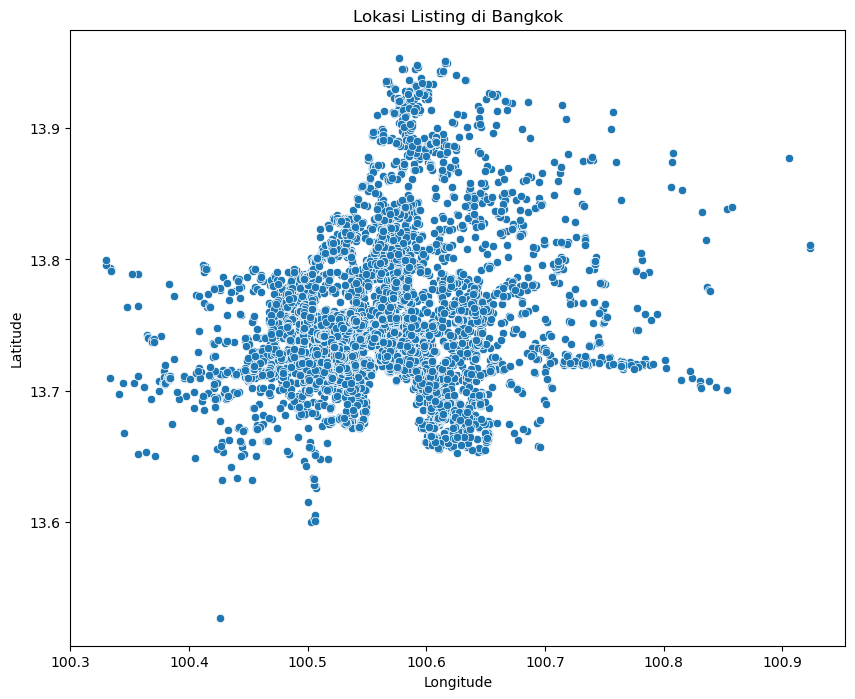

In [41]:
# Plot lokasi
plt.figure(figsize=(10,8))
sns.scatterplot(x="longitude", y="latitude", data=df)
plt.title("Lokasi Listing di Bangkok")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Listing Terkonsentrasi di Pusat Kota**: Listing di Bangkok terkonsentrasi di pusat kota, terutama di daerah yang memiliki aksesibilitas tinggi dan fasilitas yang lengkap.
2. **Pola Distribusi Listing**: Pola distribusi listing di Bangkok menunjukkan bahwa listing lebih banyak terkonsentrasi di daerah yang memiliki nilai properti yang tinggi.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Fokus pada Pusat Kota**: Pemilik properti dapat fokus pada pusat kota untuk meningkatkan pendapatan dan meningkatkan visibilitas listing.
2. **Meningkatkan Kualitas Layanan**: Pemilik properti dapat meningkatkan kualitas layanan untuk meningkatkan kepuasan tamu dan meningkatkan kemungkinan tamu untuk meninggalkan review positif.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Jumlah Listing di Pusat Kota**: Pemilik properti dapat meningkatkan jumlah listing di pusat kota untuk memenuhi permintaan tamu.
2. **Meningkatkan Kualitas Fasilitas**: Pemilik properti dapat meningkatkan kualitas fasilitas untuk meningkatkan kepuasan tamu dan meningkatkan kemungkinan tamu untuk meninggalkan review positif.
3. **Menggunakan Teknologi untuk Meningkatkan Visibilitas**: Pemilik properti dapat menggunakan teknologi untuk meningkatkan visibilitas listing dan meningkatkan kemungkinan tamu untuk menemukan listing.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Listing di Bangkok Terkonsentrasi di Pusat Kota**: Listing di Bangkok terkonsentrasi di pusat kota, terutama di daerah yang memiliki aksesibilitas tinggi dan fasilitas yang lengkap.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan fokus pada pusat kota dan meningkatkan kualitas layanan.

## 5. Persebaran Harga berdasarkan lokasi

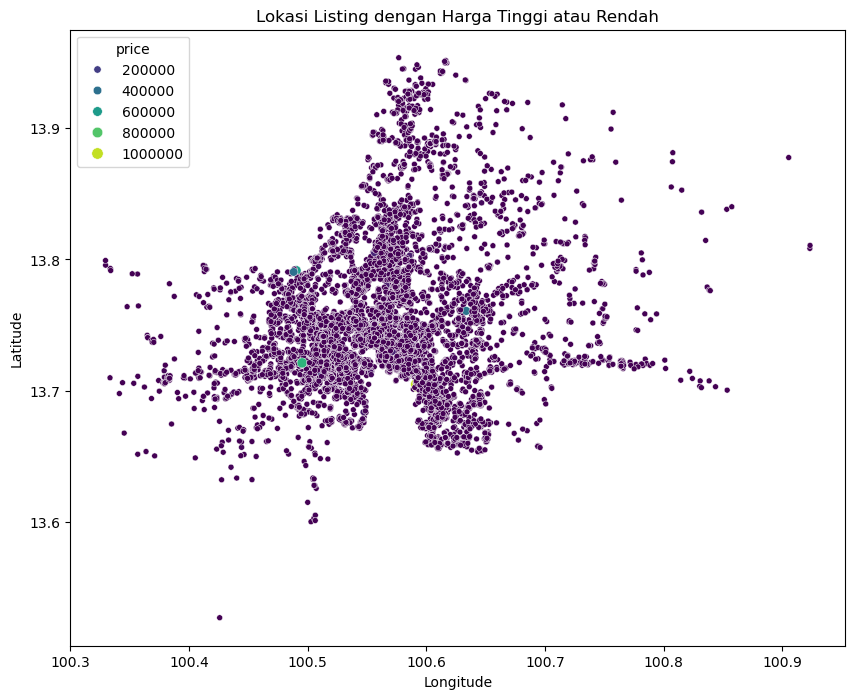

In [42]:
# Pilih kolom yang dibutuhkan
df[["latitude", "longitude", "price"]]

# Buat scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(x="longitude", y="latitude", hue="price",palette="viridis",size="price", data=df)
plt.title("Lokasi Listing dengan Harga Tinggi atau Rendah")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Lokasi Listing dengan Harga Tinggi**: Lokasi listing dengan harga tinggi dapat dilihat dari warna pada scatter plot, yang menunjukkan bahwa lokasi tersebut memiliki harga yang lebih tinggi.
2. **Lokasi Listing dengan Harga Rendah**: Lokasi listing dengan harga rendah dapat dilihat dari warna pada scatter plot, yang menunjukkan bahwa lokasi tersebut memiliki harga yang lebih rendah.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan menentukan harga yang kompetitif berdasarkan lokasi.
2. **Perluasan Pasar**: Pemilik properti dapat memperluas pasar dengan menawarkan listing di lokasi yang strategis.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Menentukan Harga yang Kompetitif**: Pemilik properti dapat menentukan harga yang kompetitif berdasarkan lokasi dan fasilitas yang ditawarkan.
2. **Mengembangkan Strategi Pemasaran**: Pemilik properti dapat mengembangkan strategi pemasaran untuk meningkatkan kesadaran dan meningkatkan permintaan listing di lokasi yang strategis.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Lokasi Listing dengan Harga Tinggi atau Rendah**: Lokasi listing dengan harga tinggi atau rendah dapat dilihat dari scatter plot, yang menunjukkan bahwa lokasi tersebut memiliki harga yang berbeda-beda.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan menentukan harga yang kompetitif dan mengembangkan strategi pemasaran yang efektif.

## Analisis Host

## 6. Pemilik dengan Banyak listing

In [57]:
# Pilih kolom yang dibutuhkan
df[["host_id", "calculated_host_listings_count"]]

,host_id,calculated_host_listings_count
0,120437,2
1,120541,2
2,123784,1
3,153730,1
4,610315,3
...,...,...
15849,94899359,1
15850,491526222,14
15851,491526222,14
15852,491526222,14


count   11248.000000
mean       19.167852
std        34.577447
min         2.000000
25%         4.000000
50%         8.000000
75%        22.000000
max       228.000000
Name: calculated_host_listings_count, dtype: float64
                                                    name    host_id host_name  \
10497   New!  La Chada Night Market studio 2PPL near MRT  201677068     Curry   
8617    New!  La Chada Night Market studio 2PPL near MRT  201677068     Curry   
8842   30days!  Sukhumvit NANA spacious 1BR 2PPL near...  201677068     Curry   
8858   30days!  Sukhumvit NANA spacious 1BR 2PPL near...  201677068     Curry   
8859    2BR！New! Near The Grand Palace/ASOK Station/4PPL  201677068     Curry   

      neighbourhood  latitude  longitude        room_type  price  \
10497   Huai Khwang 13.773320 100.580470  Entire home/apt   1057   
8617    Huai Khwang 13.772720 100.581130  Entire home/apt   1000   
8842    Ratchathewi 13.749040 100.554630  Entire home/apt   1466   
8858    Ratchathewi 

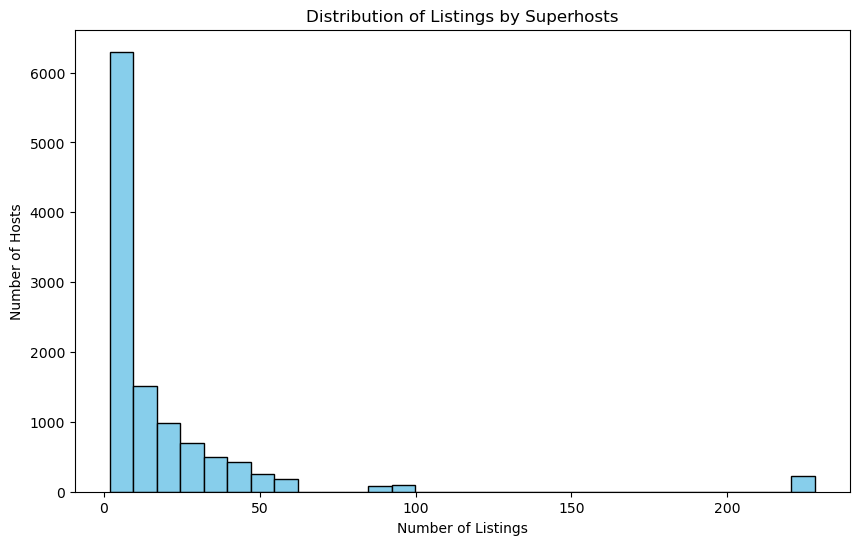

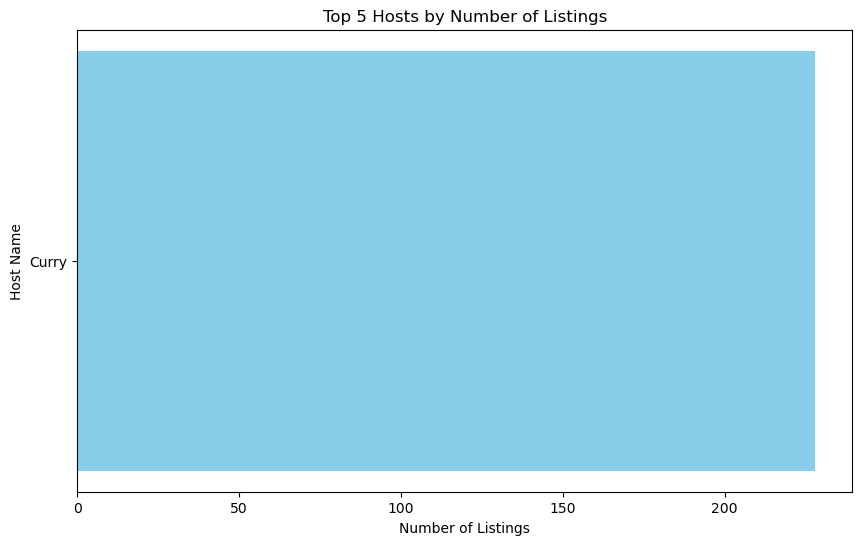

In [65]:
# Hitung jumlah host
superhost = df[df["calculated_host_listings_count"] > 1]

# Lihat distribusi jumlah listing
print(superhost["calculated_host_listings_count"].describe())

# Lihat host dengan jumlah listing terbanyak
print(superhost.sort_values(by="calculated_host_listings_count", ascending=False).head())



# Buat histogram untuk distribusi jumlah listing
plt.figure(figsize=(10,6))
plt.hist(superhost['calculated_host_listings_count'], bins=30, color='skyblue', edgecolor='black')

# Tambahkan label dan judul
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts')
plt.title('Distribution of Listings by Superhosts')

plt.show()

top_host = superhost.sort_values(by="calculated_host_listings_count", ascending=False).head()

top_host.to_csv("top_host.csv", index=False)

# Buat bar chart pakai host_name
plt.figure(figsize=(10,6))
plt.barh(top_host['host_name'], top_host['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.title('Top 5 Hosts by Number of Listings')
plt.gca().invert_yaxis()
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Ada Host yang Memiliki Banyak Properti**: Terdapat host yang memiliki lebih dari 1 listing, bahkan ada yang memiliki puluhan atau ratusan listing.
2. **Distribusi Jumlah Listing**: Distribusi jumlah listing menunjukkan bahwa sebagian besar host memiliki jumlah listing yang relatif sedikit.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peluang untuk Meningkatkan Pendapatan**: Host yang memiliki banyak properti dapat meningkatkan pendapatan dengan meningkatkan kualitas layanan dan meningkatkan visibilitas listing.
2. **Perluasan Pasar**: Host yang memiliki banyak properti dapat memperluas pasar dengan menawarkan listing di lokasi yang berbeda.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Kualitas Layanan**: Host yang memiliki banyak properti dapat meningkatkan kualitas layanan untuk meningkatkan kepuasan tamu dan meningkatkan kemungkinan tamu untuk meninggalkan review positif.
2. **Menggunakan Teknologi untuk Meningkatkan Visibilitas**: Host yang memiliki banyak properti dapat menggunakan teknologi untuk meningkatkan visibilitas listing dan meningkatkan kemungkinan tamu untuk menemukan listing.
3. **Mengembangkan Strategi Pemasaran**: Host yang memiliki banyak properti dapat mengembangkan strategi pemasaran untuk meningkatkan kesadaran dan meningkatkan permintaan.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Ada Host yang Memiliki Banyak Properti**: Terdapat host yang memiliki lebih dari 1 listing, bahkan ada yang memiliki puluhan atau ratusan listing.
2. **Peluang untuk Meningkatkan Pendapatan**: Host yang memiliki banyak properti dapat meningkatkan pendapatan dengan meningkatkan kualitas layanan dan meningkatkan visibilitas listing.

## 7. Ketersediaan Properti

               host_id     latitude    longitude          price  \
count     15853.000000 15853.000000 15853.000000   15853.000000   
mean  154092756.725099    13.745144   100.559903    3217.906895   
min       58920.000000    13.527300   100.329550     278.000000   
25%    39744308.000000    13.720090   100.529690     900.000000   
50%   122455569.000000    13.738490   100.561410    1429.000000   
75%   239027368.000000    13.759500   100.585150    2429.000000   
max   492665929.000000    13.953540   100.923440 1100000.000000   
std   131866606.052641     0.043041     0.050912   24972.896932   

       minimum_nights  number_of_reviews                    last_review  \
count    15853.000000       15853.000000                          15853   
mean        15.293257          16.655207  2002-10-18 21:11:46.465653248   
min          1.000000           0.000000            1970-01-01 00:00:00   
25%          1.000000           0.000000            1970-01-01 00:00:00   
50%          1.000000

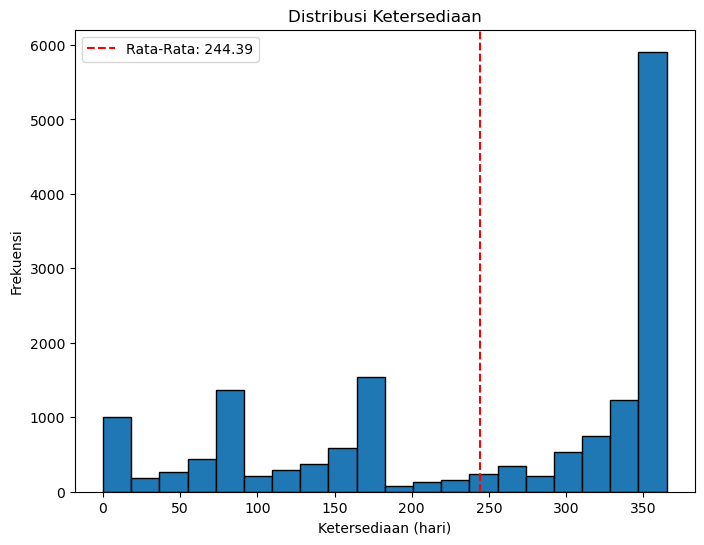

In [62]:
# Pilih kolom yang dibutuhkan
df["availability_365"]

# Hitung statistik deskriptif
print(df.describe())


# Hitung rata-rata ketersediaan
avg_availability = df["availability_365"].mean()

pd.DataFrame([avg_availability], columns=["avg_availability"]).to_csv("avg_availability.csv", index=False)



# Buat histogram
plt.figure(figsize=(8,6))
plt.hist(df["availability_365"], bins=20, edgecolor="black")
plt.axvline(avg_availability, color="red", linestyle="dashed", label=f"Rata-Rata: {avg_availability:.2f}")
plt.title("Distribusi Ketersediaan")
plt.xlabel("Ketersediaan (hari)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

## **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Rata-Rata Ketersediaan**: Rata-rata properti tersedia untuk disewa sekitar 244 hari dalam setahun.
2. **Distribusi Ketersediaan**: Distribusi ketersediaan properti menunjukkan bahwa sebagian besar properti tersedia untuk disewa selama sekian hari dalam setahun.
   - Median Ketersediaan: Median ketersediaan adalah 309 hari, yang menunjukkan bahwa sebagian besar properti tersedia untuk disewa lebih dari setengah tahun.
   - Kuartil Ketersediaan: Kuartil pertama (25%) adalah 138 hari, sedangkan kuartil ketiga (75%) adalah 360 hari, yang menunjukkan bahwa sebagian besar properti tersedia 
     untuk disewa selama periode yang cukup lama.
      
#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan meningkatkan ketersediaan properti untuk disewa.
2. **Perluasan Pasar**: Pemilik properti dapat memperluas pasar dengan menawarkan properti untuk disewa selama periode yang lebih lama.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Ketersediaan Properti**: Pemilik properti dapat meningkatkan ketersediaan properti untuk disewa dengan memperbarui kalender ketersediaan secara teratur.
2. **Mengembangkan Strategi Pemasaran**: Pemilik properti dapat mengembangkan strategi pemasaran untuk meningkatkan kesadaran dan meningkatkan permintaan selama periode yang lebih lama.
3. **Mengoptimalkan Harga**: Pemilik properti dapat mengoptimalkan harga untuk meningkatkan pendapatan selama periode yang lebih lama.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Ketersediaan Properti**: Properti tersedia untuk disewa sekitar X hari dalam setahun.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan meningkatkan ketersediaan properti untuk disewa dan mengembangkan strategi pemasaran yang efektif.

## Analisis Review & Popularitas

## 8. Listing dengan Review terbanyak

                                                   name    host_id  \
3737      Beautiful One Bedroom Apartment Near Skytrain  116193397   
6586  FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE  158545122   
1470      37 Nature House: 10 mins to DMK Int'l Airport   35462876   
905                     The Mustang Nero/No.4 The Horse   30963587   
622                      The Mustang Nero/No.3 The Wolf   30963587   

       host_name neighbourhood  latitude  longitude        room_type  price  \
3737     Suchada    Phaya Thai 13.773690 100.540790  Entire home/apt   1571   
6586      Pailin   Lat Krabang 13.721320 100.764950     Private room   1032   
1470   Wuthiphon        Lak Si 13.871450 100.580390  Entire home/apt   1039   
905   Themustang   Khlong Toei 13.711430 100.593900       Hotel room   2329   
622   Themustang   Khlong Toei 13.712860 100.591720       Hotel room   2329   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
3737               3          

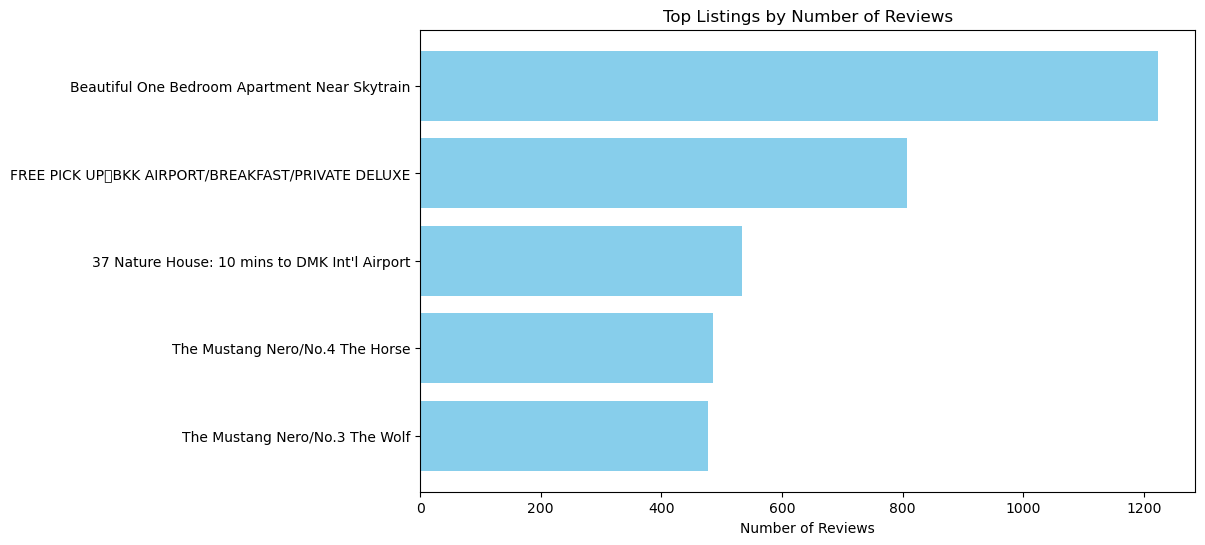

In [64]:
# Pilih kolom yang dibutuhkan
df[["name", "number_of_reviews"]]

# Urutkan data
df_sorted = df.sort_values(by="number_of_reviews", ascending=False)

# Tampilkan listing yang paling sering direview
print(df_sorted.head())

sorted = df_sorted.head()

df_sorted .to_csv("number_of_reviews.csv", index=False)

# Buat bar chart
plt.figure(figsize=(10,6))
plt.barh(sorted['name'], sorted['number_of_reviews'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.title('Top Listings by Number of Reviews')
plt.gca().invert_yaxis()  # Supaya ranking 1 di atas
plt.show()

#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1.**Listing yang Paling Sering Direview**: Listing yang paling sering direview dapat diidentifikasi berdasarkan jumlah review yang diterima.

2.**Popularitas Listing**: Listing yang paling sering direview dapat dianggap sebagai listing yang paling populer di kalangan tamu.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan mempromosikan listing yang paling populer.
2. **Perluasan Pasar**: Pemilik properti dapat memperluas pasar dengan menawarkan listing yang serupa dengan listing yang paling populer.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Kualitas Layanan**: Pemilik properti dapat meningkatkan kualitas layanan untuk meningkatkan kepuasan tamu dan meningkatkan kemungkinan tamu untuk meninggalkan review positif.
2. **Mengembangkan Strategi Pemasaran**: Pemilik properti dapat mengembangkan strategi pemasaran untuk meningkatkan kesadaran dan meningkatkan permintaan listing yang paling populer.
3. **Mengoptimalkan Harga**: Pemilik properti dapat mengoptimalkan harga untuk meningkatkan pendapatan listing yang paling populer.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Listing yang Paling Sering Direview**: Listing yang paling sering direview dapat diidentifikasi berdasarkan jumlah review yang diterima.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan mempromosikan listing yang paling populer dan mengembangkan strategi pemasaran yang efektif.

## 9. Review per Bulan

               host_id     latitude    longitude          price  \
count     15853.000000 15853.000000 15853.000000   15853.000000   
mean  154092756.725099    13.745144   100.559903    3217.906895   
min       58920.000000    13.527300   100.329550     278.000000   
25%    39744308.000000    13.720090   100.529690     900.000000   
50%   122455569.000000    13.738490   100.561410    1429.000000   
75%   239027368.000000    13.759500   100.585150    2429.000000   
max   492665929.000000    13.953540   100.923440 1100000.000000   
std   131866606.052641     0.043041     0.050912   24972.896932   

       minimum_nights  number_of_reviews                    last_review  \
count    15853.000000       15853.000000                          15853   
mean        15.293257          16.655207  2002-10-18 21:11:46.465653248   
min          1.000000           0.000000            1970-01-01 00:00:00   
25%          1.000000           0.000000            1970-01-01 00:00:00   
50%          1.000000

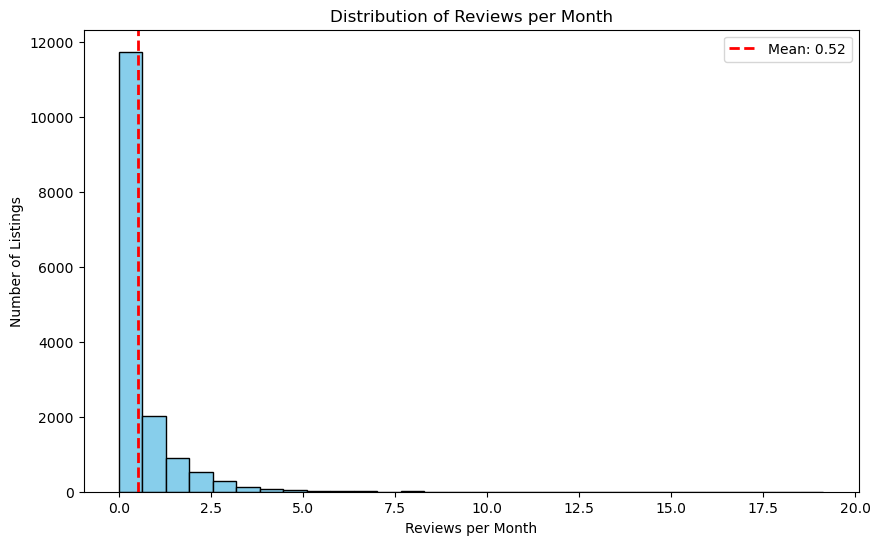

In [47]:
# Pilih kolom yang dibutuhkan
df["reviews_per_month"]

# Hitung statistik deskriptif
print(df.describe())

# Menggunakan dropna untuk menghindari NaN sebelum menghitung rata-rata
reviews_per_month = df['reviews_per_month'].dropna()

# Buat histogram
plt.figure(figsize=(10,6))
plt.hist(reviews_per_month, bins=30, color='skyblue', edgecolor='black')

# Tambahkan rata-rata sebagai garis
mean_reviews = reviews_per_month.mean()
plt.axvline(mean_reviews, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_reviews:.2f}')

# Tambahkan label dan judul
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.title('Distribution of Reviews per Month')
plt.legend()

plt.show()


#### **Insight**
Berdasarkan analisis, beberapa insight yang dapat diperoleh adalah:

1. **Rata-Rata Ulasan per Bulan**: Rata-rata listing menerima sekitar 0,52 ulasan per bulan.
2. **Distribusi Ulasan**: Distribusi ulasan menunjukkan bahwa sebagian besar listing menerima ulasan yang relatif sedikit, namun ada beberapa listing yang sangat aktif dan menarik banyak tamu.

#### **Strategic Implications**
Berdasarkan analisis, beberapa strategic implications yang dapat diperoleh adalah:

1. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan mempromosikan listing yang sangat aktif dan menarik banyak tamu.
2. **Perluasan Pasar**: Pemilik properti dapat memperluas pasar dengan menawarkan listing yang serupa dengan listing yang sangat aktif.

#### **Strategic Recommendations**
Berdasarkan analisis, beberapa strategic recommendations yang dapat diperoleh adalah:

1. **Meningkatkan Kualitas Layanan**: Pemilik properti dapat meningkatkan kualitas layanan untuk meningkatkan kepuasan tamu dan meningkatkan kemungkinan tamu untuk meninggalkan ulasan positif.
2. **Mengembangkan Strategi Pemasaran**: Pemilik properti dapat mengembangkan strategi pemasaran untuk meningkatkan kesadaran dan meningkatkan permintaan listing yang sangat aktif.
3. **Mengoptimalkan Harga**: Pemilik properti dapat mengoptimalkan harga untuk meningkatkan pendapatan listing yang sangat aktif.

#### **Conclusion**
Berdasarkan analisis, dapat disimpulkan bahwa:

1. **Listing yang Sangat Aktif**: Ada beberapa listing yang sangat aktif dan menarik banyak tamu, yang dapat diidentifikasi berdasarkan jumlah ulasan per bulan.
2. **Peluang untuk Meningkatkan Pendapatan**: Pemilik properti dapat meningkatkan pendapatan dengan mempromosikan listing yang sangat aktif dan mengembangkan strategi pemasaran yang efektif.

## =============== End Of Analysis =================